Uploading the Data set

Here the data set is uploaded.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data Center Fire Dataset.csv to Data Center Fire Dataset.csv


The data set is fairly straight forward. The following column representations are given below.\
X, Y - mo-ordinates of racks in the data center\
month - in which month the event occured\
day - in which day the event occured\
Rack_temperature - The temperature of the server racks\
Moisture - moisture level of the surroundings\
ISI	- Initial Spread Index\
Room_temperature	- temperature of the room\
humidity - humidity of the room

Data Pre-Processing

The data is pre-processed. Here the csv file is read. The shape is determined. Data set is seen for null values and unique variables.

In [ ]:
import pandas as pd
import numpy as np
import io
from sklearn.metrics import accuracy_score

dcfd = pd.read_csv(io.StringIO(uploaded['Data Center Fire Dataset.csv'].decode('utf-8')))
dcfd.head()

,X,Y,month,day,Rack_temperature,Moisture,ISI,Room_temperature,humidity
0,7,5,mar,fri,86.2,26.2,5.1,8.2,51
1,7,4,oct,tue,90.6,35.4,6.7,18.0,33
2,7,4,oct,sat,90.6,43.7,6.7,14.6,33
3,8,6,mar,fri,91.7,33.3,9.0,8.3,97
4,8,6,mar,sun,89.3,51.3,9.6,11.4,99


In [ ]:
dcfd.shape

(517, 9)

In [ ]:
dcfd.isnull().sum()

X                   0
Y                   0
month               0
day                 0
Rack_temperature    0
Moisture            0
ISI                 0
Room_temperature    0
humidity            0
dtype: int64

In [ ]:
print(dcfd['month'].unique())
print(dcfd['day'].unique())

['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']


Label encoder is used to convert unique variables into numerical values. In this case as months and days are unique, they are converted. For months values of 0-11 and for days 0-6.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode= LabelEncoder()
dcfd['month_enc']=encode.fit_transform(dcfd['month'])
print(dcfd[['month','month_enc']].head())

  month  month_enc
0   mar          7
1   oct         10
2   oct         10
3   mar          7
4   mar          7


In [15]:
dcfd['day_enc']=encode.fit_transform(dcfd['day_enc'])
print(dcfd[['day','day_enc']].head())

   day  day_enc
0  fri        0
1  tue        5
2  sat        2
3  fri        0
4  sun        3


The original columns are dropped in favor of the encoded ones.

In [16]:
dcfd2 = dcfd.drop(['month','day'],axis=1)
dcfd2.head()

,X,Y,Rack_temperature,Moisture,ISI,Room_temperature,humidity,month_enc,day_enc
0,7,5,86.2,26.2,5.1,8.2,51,7,0
1,7,4,90.6,35.4,6.7,18.0,33,10,5
2,7,4,90.6,43.7,6.7,14.6,33,10,2
3,8,6,91.7,33.3,9.0,8.3,97,7,0
4,8,6,89.3,51.3,9.6,11.4,99,7,3


In [24]:
dcfd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 517 non-null    int64  
 1   Y                 517 non-null    int64  
 2   Rack_temperature  517 non-null    float64
 3   Moisture          517 non-null    float64
 4   ISI               517 non-null    float64
 5   Room_temperature  517 non-null    float64
 6   humidity          517 non-null    int64  
 7   month_enc         517 non-null    int64  
 8   day_enc           517 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 36.5 KB


All floats are converted to ints

In [25]:
dcfd2['Rack_temperature']=dcfd2['Rack_temperature'].astype(np.int64)
dcfd2['Moisture']=dcfd2['Moisture'].astype(np.int64)
dcfd2['ISI']=dcfd2['ISI'].astype(np.int64)
dcfd2['Room_temperature']=dcfd2['Room_temperature'].astype(np.int64)

In [26]:
dcfd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   X                 517 non-null    int64
 1   Y                 517 non-null    int64
 2   Rack_temperature  517 non-null    int64
 3   Moisture          517 non-null    int64
 4   ISI               517 non-null    int64
 5   Room_temperature  517 non-null    int64
 6   humidity          517 non-null    int64
 7   month_enc         517 non-null    int64
 8   day_enc           517 non-null    int64
dtypes: int64(9)
memory usage: 36.5 KB


In [27]:
dcfd2.head()

,X,Y,Rack_temperature,Moisture,ISI,Room_temperature,humidity,month_enc,day_enc
0,7,5,86,26,5,8,51,7,0
1,7,4,90,35,6,18,33,10,5
2,7,4,90,43,6,14,33,10,2
3,8,6,91,33,9,8,97,7,0
4,8,6,89,51,9,11,99,7,3


Data Split Train Test

Here the data is split into training and testing phases in the ratio of 80:20. Shapes of the training and testing data are shown.

In [113]:
from sklearn.model_selection import train_test_split

y=dcfd2.Rack_temperature
X=dcfd2.drop('Room_temperature',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

print("Training set: X->{} , y->{} \nTesting set: X->{} , y->{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

Training set: X->(413, 8) , y->(413,) 
Testing set: X->(104, 8) , y->(104,)


K-Nearest Neignbour - KNN imported and utilized for calculating the training and testing accuracy.

KNN

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
KNN_train_score = knn.score(X_train,y_train)
KNN_test_score = knn.score(X_test,y_test)
print("Training accuracy of K-Nearest Neignbour is {:.2f}".format(KNN_train_score))
print("Testing accuracy of K-Nearest Neignbour is {:.2f}".format(KNN_test_score))

Training accuracy of K-Nearest Neignbour is 0.67
Testing accuracy of K-Nearest Neignbour is 0.44


SVM

Support Vector Machine - SVM imported and utilized for calculating the training and testing accuracy.

In [116]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)
SVC_train_score = svc.score(X_train,y_train)
SVC_test_score = svc.score(X_test,y_test)
print("Training accuracy of Support Vector Machine is {:.2f}".format(SVC_train_score))
print("Testing accuracy of Support Vector Machine is {:.2f}".format(SVC_test_score))

Training accuracy of Support Vector Machine is 1.00
Testing accuracy of Support Vector Machine is 0.96


RFC

Random Forest Classifier - RFC imported and utilized for calculating the training and testing accuracy.

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
RFC_train_score = rfc.score(X_train,y_train)
RFC_test_score = rfc.score(X_test,y_test)
print("Training accuracy of Random Forest is {:.2f}".format(RFC_train_score))
print("Testing accuracy of Random Forest is {:.2f}".format(RFC_test_score))

Training accuracy of Random Forest is 1.00
Testing accuracy of Random Forest is 0.92


Graph Results

Results are plotted graphically.

In [100]:
import matplotlib.pyplot as plt
import numpy as np

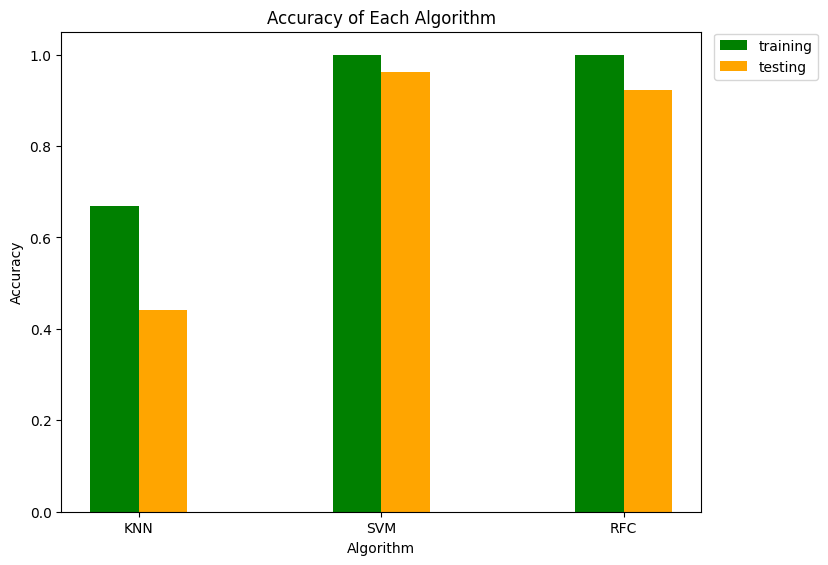

In [117]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
train = [KNN_train_score, SVC_train_score, RFC_train_score]
test = [KNN_test_score,SVC_test_score,RFC_test_score]
algorithms = ['KNN', 'SVM', 'RFC']
x = np.arange(len(algorithms))
plt.bar(x - 0.1, train, 0.2, label = 'training',color='Green')
plt.bar(x + 0.1, test, 0.2, label = 'testing',color='Orange')
plt.xticks(x, algorithms)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy of Each Algorithm")
plt.legend(loc=[1.02,0.9])
plt.show()

Correlation between all attributes. Visualized in heat map.

In [106]:
dcfd_corr=dcfd.corr()
dcfd_corr

<ipython-input-106-ca266eb47668>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dcfd_corr=dcfd.corr()


,X,Y,Rack_temperature,Moisture,ISI,Room_temperature,humidity,month_enc,day_enc
X,1.000000,0.539548,-0.021039,-0.048384,0.006210,-0.051258,0.085223,-0.017303,-0.009129
Y,0.539548,1.000000,-0.046308,0.007782,-0.024488,-0.024103,0.062221,-0.062162,0.030100
Rack_temperature,-0.021039,-0.046308,1.000000,0.382619,0.531805,0.431532,-0.300995,-0.007636,0.074914
Moisture,-0.048384,0.007782,0.382619,1.000000,0.305128,0.469594,0.073795,-0.173152,0.070218
ISI,0.006210,-0.024488,0.531805,0.305128,1.000000,0.394287,-0.132517,-0.172087,0.117738
Room_temperature,-0.051258,-0.024103,0.431532,0.469594,0.394287,1.000000,-0.527390,-0.073802,0.148672
humidity,0.085223,0.062221,-0.300995,0.073795,-0.132517,-0.527390,1.000000,-0.102057,-0.103389
month_enc,-0.017303,-0.062162,-0.007636,-0.173152,-0.172087,-0.073802,-0.102057,1.000000,-0.150982
day_enc,-0.009129,0.030100,0.074914,0.070218,0.117738,0.148672,-0.103389,-0.150982,1.000000


<Axes: >

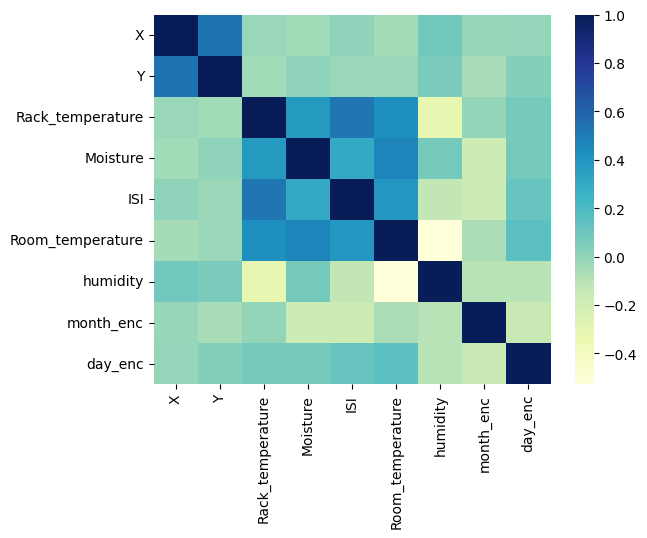

In [110]:
import seaborn as sbs
sbs.heatmap(dcfd_corr,cmap='YlGnBu')

We can see Rack-temperature, moisture, ISI and room_temperature to be fairly coreleated with eachother.